In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [32]:
df=pd.read_csv('C:/Users/Mehmet Nur Kavan/Desktop/machine_learning/301/Hitters.csv')
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"] # bağımlı değişken
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
x=pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [43]:
x_train = pd.DataFrame(x_train["Hits"]) # atıs sayısı
x_test = pd.DataFrame(x_test["Hits"])

model & tahmin

In [45]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10) #max_leaf_nodesi istediğin gibi ayarlıyon boş bırakırsan tke tek gidiyor

In [46]:
cart_model.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

C:\Users\Mehmet Nur Kavan\AppData\Local\Temp\ipykernel_17216\1251782632.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(np.array(x_train)),max(np.array(x_train)), 0.01)
c:\Users\Mehmet Nur Kavan\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Maaş (Salary)')

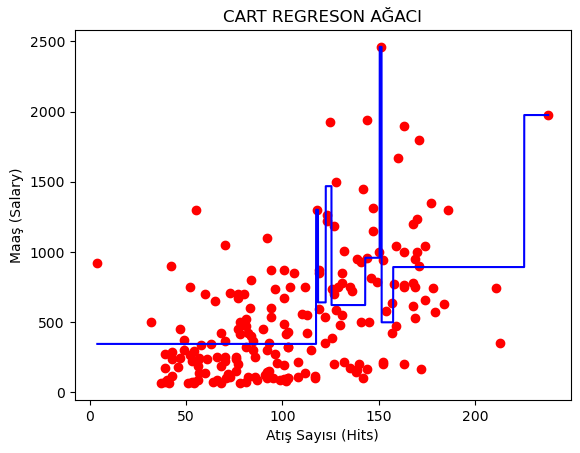

In [47]:
x_grid = np.arange(min(np.array(x_train)),max(np.array(x_train)), 0.01)
x_grid= x_grid.reshape((len(x_grid),1))
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_grid, cart_model.predict(x_grid), color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Atış Sayısı (Hits)')
plt.ylabel('Maaş (Salary)')

tek değişkenli tahmin

In [48]:
cart_model.predict(x_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [49]:
y_pred= cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [40]:
df=pd.read_csv('C:/Users/Mehmet Nur Kavan/Desktop/machine_learning/301/Hitters.csv')
df=df.dropna()
dms=pd.get_dummies(df[['League','Division','NewLeague']])
y=df["Salary"] # bağımlı değişken
x_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
x=pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [41]:
cart_model = DecisionTreeRegressor().fit(x_train, y_train)

In [42]:
y_pred = cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

472.5689610346929

Model Tuning

In [50]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=10)

In [59]:
cart_model = DecisionTreeRegressor(max_depth=3).fit(x_train, y_train)
y_pred= cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

423.406689243066

In [61]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=3)
File:        c:\users\mehmet nur kavan\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean 

In [62]:
cart_params = {"max_depth":[2,3,4,5,10,20], 
              "min_samples_split": [2,10,5,30,50,10]}

In [63]:
cart_model = DecisionTreeRegressor()

In [64]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(x_train, y_train)

In [65]:
cart_cv_model.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [66]:
cart_tuned = DecisionTreeRegressor(max_depth=10, min_samples_split=50).fit(x_train, y_train)

In [67]:
y_pred= cart_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

421.25868329005385